# **Exercise1:Setting Up the Environment**

In [2]:
pip install pgmpy matplotlib networkx

# **Exercise 2: Building a Simple DBN**

In [3]:
from pgmpy.models import DynamicBayesianNetwork
from pgmpy.factors.discrete import TabularCPD

dbn = DynamicBayesianNetwork()

dbn.add_edges_from([(('Rain', 0), ('Sprinkler', 0)),
                     (('Sprinkler', 0), ('WetGrass', 0)),
                     (('Rain', 1), ('WetGrass', 1)),
                     (('Sprinkler', 1), ('WetGrass', 1))])

from pgmpy.inference import DBNInference

cpd_rain = TabularCPD(('Rain', 0), 2, [[0.8], [0.2]])
cpd_sprinkler = TabularCPD(('Sprinkler', 0), 2, [[0.9, 0.5], [0.1, 0.5]],
                            evidence=[('Rain', 0)], evidence_card=[2])
cpd_wetgrass = TabularCPD(('WetGrass', 0), 2, [[1, 1, 0, 0], [0, 0, 1, 1]],
                           evidence=[('Sprinkler', 0), ('Rain', 0)], evidence_card=[2, 2])


dbn.add_cpds(cpd_rain, cpd_sprinkler, cpd_wetgrass)

# **Exercise 3: Performing Inference**

In [4]:
inference = DBNInference(dbn)

result = inference.query(variables=[('WetGrass', 0)], evidence={('Rain', 0): 1, ('Sprinkler', 0): 1})
print(result)

{('WetGrass', 0): <DiscreteFactor representing phi(('WetGrass', 0):2) at 0x7cf50bc395d0>}


# **Exercise 4: Visualizing the DBN**

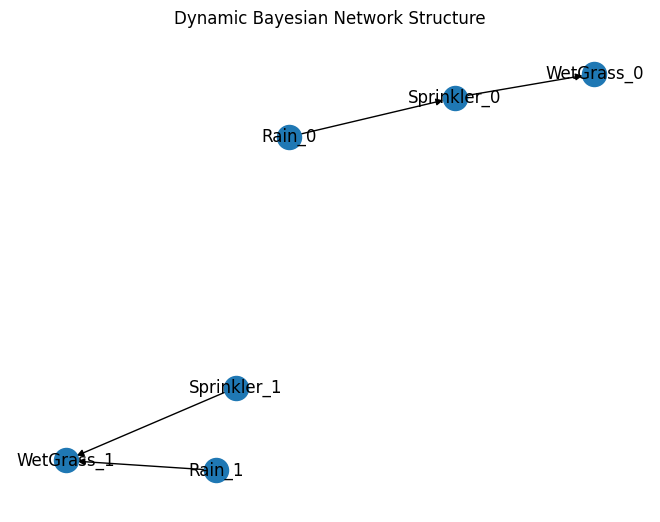

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_edges_from([('Rain_0', 'Sprinkler_0'),
                  ('Sprinkler_0', 'WetGrass_0'),
                  ('Rain_1', 'WetGrass_1'),
                  ('Sprinkler_1', 'WetGrass_1')])


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.title("Dynamic Bayesian Network Structure")
plt.show()

# **Exercise 5: Extending the DBN**

In [6]:
from pgmpy.factors.discrete import TabularCPD

cpd_rain_0 = TabularCPD(('Rain', 0), 2, [[0.2], [0.8]], state_names={('Rain', 0): ['yes', 'no']})
cpd_rain_1 = TabularCPD(('Rain', 1), 2, [[0.7], [0.3]], state_names={('Rain', 1): ['yes', 'no']})

cpd_sprinkler_0 = TabularCPD(('Sprinkler', 0), 2, [[0.6, 0.4], [0.9, 0.1]],
                          evidence=[('Rain', 0)], evidence_card=[2],
                          state_names={('Sprinkler', 0): ['on', 'off'], ('Rain', 0): ['yes', 'no']})
cpd_sprinkler_1 = TabularCPD(('Sprinkler', 1), 2, [[0.3, 0.7], [0.8, 0.2]],
                          evidence=[('Rain', 1)], evidence_card=[2],
                          state_names={('Sprinkler', 1): ['on', 'off'], ('Rain', 1): ['yes', 'no']})

cpd_wetgrass_0 = TabularCPD(('WetGrass', 0), 2, [[0.95, 0.8, 0.9, 0.0],
                                            [0.05, 0.2, 0.1, 1.0]],
                           evidence=[('Sprinkler', 0), ('Rain', 0)],
                           evidence_card=[2, 2],
                           state_names={('WetGrass', 0): ['yes', 'no'],
                                       ('Sprinkler', 0): ['on', 'off'],
                                       ('Rain', 0): ['yes', 'no']})

cpd_wetgrass_1 = TabularCPD(('WetGrass', 1), 2, [[0.99, 0.9, 0.9, 0.0],
                                            [0.01, 0.1, 0.1, 1.0]],
                           evidence=[('Sprinkler', 1), ('Rain', 1)],
                           evidence_card=[2, 2],
                           state_names={('WetGrass', 1): ['yes', 'no'],
                                       ('Sprinkler', 1): ['on', 'off'],
                                       ('Rain', 1): ['yes', 'no']})



dbn.add_cpds(cpd_rain_0, cpd_rain_1, cpd_sprinkler_0, cpd_sprinkler_1, cpd_wetgrass_0, cpd_wetgrass_1)